# Problem 1: Bandits (15 points)

In this problem you'll experiment with upper confidence bound (UCB) action selection for a multi-armed bandit (MAB) problem. The reward of each arm is drawn from a normal distribution with a different mean and unit variance. The agent does not know how the arm rewards are distributed, and the goal is to maximize the sum of rewards it receives over time.

The function below defines a three-armed bandit with the provided mean parameters. After trying each action once, the agent follows UCB to try an action 1000 more times (the exploration weight parameter ```c``` is also provided). When finished, the program prints the number of times each action has been tried, and it plots both the action value estimates and UCB values over time.

In [75]:
import numpy as np
from matplotlib import pyplot as plt

def UCB_bandit(means, c):
  Q = np.empty([1001, len(means)])
  Q[0,:] = np.array([np.random.normal(mu, 1) for mu in means])
  N = np.ones(len(means))
  UCB = np.empty([1000, len(means)])

  for i in range(1,1001):
    UCB[i-1,:] = c*np.sqrt(np.divide(np.log(i),N))
    a = np.argmax(Q[i-1,:] + UCB[i-1,:])
    r = np.random.normal(means[a], 1)
    Q[i,:] = Q[i-1,:]
    Q[i,a] = (Q[i,a]*N[a] + r) / (N[a] + 1)
    N[a] += 1

  print("N: ", N)

  plt.figure()
  for i in range(len(means)):
    plt.plot(range(0,1001), Q[:,i], label="action "+str(i));
  plt.legend();
  plt.title("Q_t vs t");

  plt.figure()
  for i in range(len(means)):
    plt.plot(range(1,1001), UCB[:,i], label="action "+str(i));
  plt.legend();
  plt.title("UCB vs t");

N:  [316. 321. 366.]


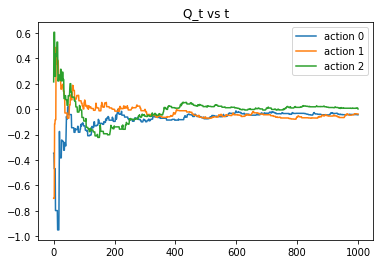

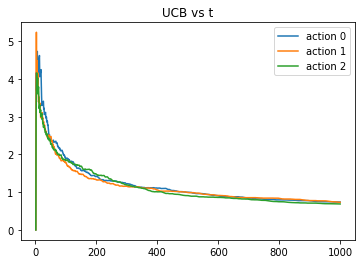

In [76]:
# UCB_bandit([-2,0,2], 1)
# UCB_bandit([0,0,0], 1)
UCB_bandit([0,0,0], 5)

Run ```UCB_bandit``` for each set of parameters above. You should run each scenario at least a few times to get a sense of what the results tend to look like, since the bandit rewards are not fixed. Then briefly describe your observations.

1.  Run ```UCB_bandit``` with the parameters ```([-2,0,2],1)```. Which $Q_t$ sample estimates converge to the true mean values $Q^*$, and why do they not all converge? Of the UCB values, which generally decrease and which generally increase over time? Explain the presence of any discontinuous "jumps" that you see along these curves.

2.  Experiment with the parameters ```([0,0,0],1)```. Again, be sure to run the simulation several times. Do the convergence of the $Q_t$ values and behavior of the UCB values appear to be consistent over different runs? Why or why not? Comment on the observed distribution of ```N```, the numbers of times each action is tried.

3.  Experiment with the parameters ```([0,0,0],5)``` and answer the same questions as in the previous part. How does this different value of the ```c``` parameter change the simulation results and how many times each action is tried?


ENTER YOUR RESPONSES HERE

1. The "action 2" estimate usually converges to the true mean value of Q*=2 since it is the optimal choice for the MAB, so it is selected more often and the value becomes clearer. They do not all converge, because the lower values are selected during exploration, but not that often, so there estimates will be less accurate. Of the UCB values, the "action 2" UCB tends to decrease and converge to 0, because the model becomes more confident in its result. The other actions tend to increase since they become more relatively uncertain as t increases, but Nt(a) does not. The jump in UCB happens when a lower value is explored and its estimate jumps a lot, causing the model to get a jump of confidence.
2. Yes, the convergence and behavior are consistent over different runs (with some exceptions), since the model tries each value about equally, so it gets high confidence in all of the values. All the values converge to 0 (true value) and the UCB values converge to 0 meaning higher confidence. Each action is tried about equally, because all of them are truly optimal, allowing for more exploration.
3. With c=5, the convergence and behavior are still consistent. The higher c value results in a higher (less confident) UCB, but since all the true values are equal, it results in about the same amount of exploration. The different c values for this model does not change the simulaiton results, since they all converge to 0 and are explored about equally, it does however change the UCB by making all of the values equally higher (but still converge to 0).

# Problem 2: Race Car MDP (15 points)

Let's revisit the race car MDP from the lecture. There are three states, of which "overheated" is a terminal state. The other two states each have two valid actions, "fast" and "slow".

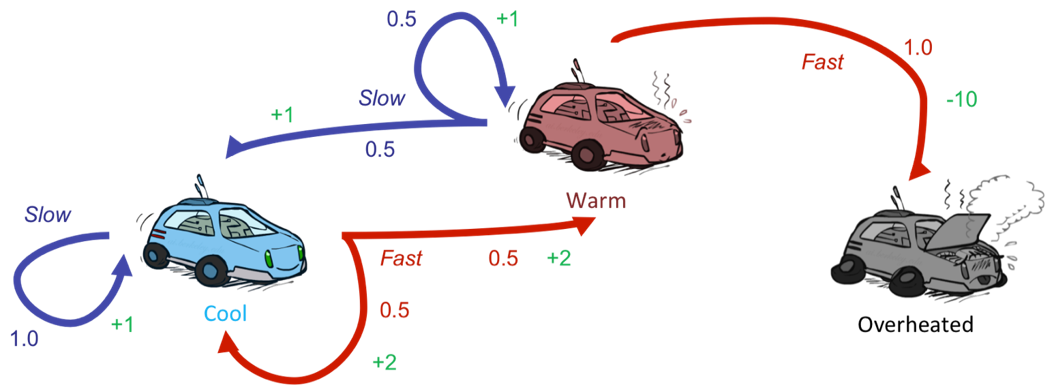

1. Write down and solve a system of linear equations that would give us the state values for the policy of going slow in both the cool and warm states. Use $\gamma = 0.8$ and assume that $V^\pi(\text{overheated}) = 0$.

2. Use the values you found above to "improve" the given policy. Be sure to write down the equations you use. The two steps above constitute one round of policy iteration.

ENTER YOUR SOLUTIONS HERE

1. 
---
Equations
*   Vpi(Cool) = 1 (1 + 0.8 ( Vpi(Cool) ))
*   Vpi(Warm) = 0.5 (1 + 0.8 ( Vpi(Cool) )) + 0.5 (1 + 0.8 ( Vpi(Warm) ))
*   Vpi(Overheated) = 0
---
Results

*   Vpi(Cool) = 5
*   Vpi(Warm) = 5
---

2.  To improve the policy, we should find the argmax of pi*(Cool) and pi*(Warm). Given V*(Cool) = 5 and V*(Warm) = 5 and V*(Overheated) = 0.
---
Equations
*   Vpi(Cool) = argmax{
*   1(1 + 0.8( V*(Cool) ))
*   0.5(0.5 + 0.8 (V*(Cool))) + 0.5(0.5 + 0.8 (V*(Warm)))
}


*   Vpi(Warm) = argmax{
*   0.5(1 + 0.8 (V*(Cool))) + 0.5(1 + 0.8 (V*(Warm)))
*   1(-10 + 0.8 (V*(Overheated)))
}
---
Results


*   Vpi(Cool) = 5 (slow/fast)
*   Vpi(Warm) = 5 (slow)

The improved policy is still slow for the warm state and it could be either slow or fast for the cool state, the expected values were the same.










# Cliffworld

In this assignment you will explore sequential decision making in the gridworld with a cliff, or the "cliffworld". As shown in the accompanying figure, the cliffworld is a 4 by 12 grid, where the bottom row consists of a "cliff" along with a start and a goal. We would like our agent to learn to get from start to goal without falling into the cliff. All transitions incur a living reward of -1, except for transitions out of the cliff which incur a cost of -100. The goal state is terminal and has no associated actions.

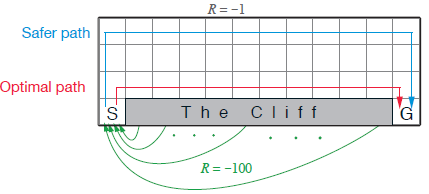

This problem is naturally represented as a MDP with each traversable cell as a state. Actions are left (<), right (>), up (^), and down (v); cliff states ('C') only have the action of teleporting to the start state. These are enumerated by the ```actions``` function . The cardinal direction actions are noisy; the agent moves in its intended direction with probability $p$ and in the two adjacent directions with probability $\frac12(1-p)$ each. When the agent moves into a wall, it stays in its original state. 

We have encoded all of this information for you in the ```Qvalue``` function below. A ```state``` is represented as a tuple of two indices that follow the same convention as a Numpy array; top left is (0,0), start is (3,0), and goal is (3,11). Given a ```state```, an ```action```, and a 2D numpy array of ```values```, the function computes the Q-value of taking ```action``` from ```state```, taking into account uncertainties, rewards, and successor state values. A discount factor ```gamma``` may also be applied.

In [77]:
import numpy as np
from matplotlib import pyplot as plt

def actions(state):
  if state == (3,11): return ['G']
  if state[0] == 3 and 0 < state[1] < 11: return ['C']
  return ['<', '>', '^', 'v']

def Qvalue(state, action, values, p, gamma):
  """
  Compute the Q-value for the given state-action pair,
  given a set of values for the problem, with successful transition
  probability p and discount factor gamma.
  """
  i,j = state
  gV = gamma*values
  pn = (1-p)/2

  # Handle goal and cliff states
  if action == 'G':
    return 0
  if action == 'C':
    return -100 + gV[(3,0)]

  # All possible successor states
  left = (i,max(j-1,0))
  right = (i,min(j+1,11))
  up = (max(i-1,0),j)
  down = (min(i+1,3),j)

  # Q-value computation
  if action == '<':
    return p*(-1+gV[left]) + pn*(-1+gV[up]) + pn*(-1+gV[down])
  elif action == '>':
    return p*(-1+gV[right]) + pn*(-1+gV[up]) + pn*(-1+gV[down])
  elif action == '^':
    return p*(-1+gV[up]) + pn*(-1+gV[left]) + pn*(-1+gV[right])
  else:
    return p*(-1+gV[down]) + pn*(-1+gV[left]) + pn*(-1+gV[right])

## Coding 1 (15 points)

Value iteration can be used to obtain the optimal values for each state. Recall that the Bellman update, if using state-action values to update state values, looks like the following:

$$ V_{i+1}(s) \leftarrow \max_a Q_i(s,a) $$

Implement value iteration in the function below. An initial 2D array of ```values``` is provided, as well as the ```p``` and ```gamma``` parameters that ```Qvalue``` requires. The function should iteratively sweep over all state values and update them using the Bellman update; be sure that your updates are synchronous, which means that you should distinguish "new" and "old" values within a sweep. The process finishes when the maximum absolute difference in values between two successive sweeps is lower than ```threshold```. You should append each successive maximum difference to the growing list ```max_diffs```, such that the last element in each sweep (the -1 element) is the most recent difference.

When finished, return the final array of converged state values, as well as the list ```max_diffs```.

In [78]:
def value_iteration(values, p, gamma, threshold=1e-6):
  """
  INPUTS: An initial 2D Numpy array of state values, p and gamma parameters, 
  and stopping threshold for value iteration
  OUTPUTS: Converged 2D Numpy array of state values, list of max diffs between
  successive iterations
  """
  max_diffs = [float("inf")]
  while max_diffs[-1] >= threshold:
    # YOUR CODE HERE

    max_diff = 0

    for i in range(values.shape[0]):
      for j in range(values.shape[1]):

        new_list = list()

        for action in actions((i,j)):
          v = Qvalue( (i,j), action, values, p, gamma )
          new_list.append(v)

        new_val = max(new_list)
        
        curr_diff = abs(new_val-values[i][j])
        if (curr_diff > max_diff):
          max_diff = curr_diff

        values[i][j] = new_val

    max_diffs.append( max_diff )

  return values, max_diffs

Now that we can compute optimal values, we can extract an optimal policy as well. Recall that this can be done using Q-values as follows:

$$ \pi^*(s) = \text{argmax}_a Q(s,a) $$

We've implement this for you in ```extract_policy``` below. Following that we also have a wrapper function that uses both functions to find the optimal values and policy together and prints them both out. 

In [79]:
def extract_policy(values, p, gamma):
  # Extract the optimal policy associated with the given optimal values
  policy = np.empty(values.shape, dtype=object)
  for i in range(4):
    for j in range(12):
      best_value = -float("inf")
      for a in actions((i,j)):
        new_value = Qvalue((i,j), a, values, p, gamma)
        if new_value > best_value:
          best_value = new_value
          policy[i,j] = a
  return policy

def solve_cliffworld(p, gamma):
  # Find and show the optimal values and policy for the given parameters
  values, diffs = value_iteration(np.zeros((4,12)), p, gamma)
  policy = extract_policy(values, p, gamma) 

  np.set_printoptions(linewidth=100)
  print(np.round(values,2),"\n")
  print(policy,"\n")
  plt.plot(np.arange(1,len(diffs)-1), diffs[2:])
  plt.title("Max difference in values in each iteration")

You'll be running the following code cell for different values of ```p``` and ```gamma``` and analyzing the outputs, which consist of the optimal state values, the optimal policy, and a plot showing how ```max_diff``` varies over time (starting from the second iteration, since the first set of differences will be quite large). To check that your value iteration is implemented correctly, the values for $p=1$ and $\gamma=1$ are as follows:

```
[[ -14.  -13.  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.]
 [ -13.  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.]
 [ -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.]
 [ -13. -113. -113. -113. -113. -113. -113. -113. -113. -113. -113.    0.]]
```



[[  -2.     -2.     -2.     -2.     -2.     -2.     -1.99   -1.98   -1.97   -1.94   -1.88   -1.75]
 [  -2.     -2.     -2.     -2.     -2.     -1.99   -1.98   -1.97   -1.94   -1.88   -1.75   -1.5 ]
 [  -2.     -2.     -2.     -2.     -1.99   -1.98   -1.97   -1.94   -1.88   -1.75   -1.5    -1.  ]
 [  -2.   -101.   -101.   -101.   -101.   -101.   -101.   -101.   -101.   -101.   -101.      0.  ]] 

[['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['^' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'G']] 



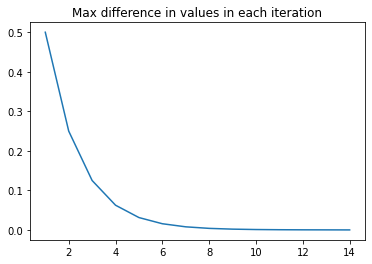

In [80]:
p = 1
gamma = .5
solve_cliffworld(p, gamma)

## Response 1 (15 points)
1. How do the state values change when you a) decrease $p$ and keep $\gamma$ fixed, and b) decrease $\gamma$ and keep $p$ fixed? To get a sense of the full range of possible outputs, remember that both values are lower-bounded by 0. Briefly explain your observations.

2. How does the policy change when you a) decrease $p$ and keep $\gamma$ fixed, and b) decrease $\gamma$ and keep $p$ fixed? Note that the policy is discrete, unlike the values, so you may only see a change occur if you hit a certain threshold in either value. Briefly explain your observations.

3. Can you quantify or bound the rate of decrease in the maximum difference between values between two iterations for $0<\gamma<1$? How does this affect the number of iterations required for convergence?

ENTER YOUR RESPONSES HERE

1. a) When decreasing p, all of the values get lower, but the values closer to the cliff get lower faster. This is because with greater probability of error, the expected value closer to the cliff becomes lower since even a .1 chance of falling off drops the expected value down a lot. b) when decreasing gamma, the values become more uniform and closer to their original state value, since decreasing gamma decreases how much future actions affects the expected value.
2. a) The states right by the cliff change from > to ^ to be more cautious about falling off, then when the p value gets really low even states more up and to the left change to ^ to be cautious. b) Eventually once the gamma gets low enough the more left states change from > to < since they can't see far ahead enough and with enough precision to account for the terminal state.
3. As gamma gets lower, the rate of decrease of the maximum difference gets higher. The max difference starts at gamma and is multiplied by gamma each iteration (except for 1), so the lower gamma values require fewer iterations before convergence.

## Coding 2 (10 points)

You hopefully now have a good understanding of the dynamics of this cliffworld. But our agent may be more clueless--let's suppose it no longer has access to the ```Qvalue``` function (the problem model). To find out what's going on in the world, it will actually have to take actions and learn from them à la reinforcement learning. 

We will use temporal difference learning, which explicitly keeps track of Q-values. These will be stored as a dictionary, where the key is a ```(state, action)``` tuple and the value is the Q-value. 

In RL, an agent has to balance exploitation and exploration. A simple way to do so is to use $\varepsilon$-greedy action selection. Remember that in this scheme, an agent selects a random action with probability $\varepsilon$ and the best action (the one with the highest Q-value in the given state) otherwise. Implement this function below (hint: look at using ```random.random()``` and ```random.choice()```).

In [81]:
import random

def epsilon_greedy_action(Qvalues, state, epsilon):
  # Explore a random action from state with probability epsilon
  # Otherwise, greedily choose the best action
  # Qvalues is a dictionary that looks like {(state, action): q-value}
  
  # YOUR CODE HERE
  if (epsilon > random.random()):
    # random choice
    return random.choice(actions(state))
  else:
    # highest Qval
    maxQ = -9999
    best_action = '-'
    for action in actions(state):
      if (Qvalues[(state, action)] > maxQ):
        maxQ = Qvalues[(state, action)]
        best_action = action

    return best_action


During learning, the agent repeatedly takes an action from its current state, observes the successor state and reward, and repeats. If the agent encounters a terminal (here, goal) state, we consider the episode over, and it goes back to the start. The ```step``` function below returns the successor state and associated reward after taking ```action``` from ```state```. This is essentially a black box to the agent, as it has no idea what is inside.

In [82]:
def step(state, action, p):
  # Return successor state and reward upon taking action from state
  i,j = state
  if action == 'C':
    return (3,0), -100

  if action == '<':
    if random.random() < p: return (i,max(j-1,0)), -1
    else: return random.choice([(max(i-1,0),j), (min(i+1,3),j)]), -1
  if action == '>':
    if random.random() < p: return (i,min(j+1,11)), -1
    else: return random.choice([(max(i-1,0),j), (min(i+1,3),j)]), -1
  if action == '^':
    if random.random() < p: return (max(i-1,0),j), -1
    else: return random.choice([(i,max(j-1,0)), (i,min(j+1,11))]), -1
  else:
    if random.random() < p: return (min(i+1,3),j), -1
    else: return random.choice([(i,max(j-1,0)), (i,min(j+1,11))]), -1

In class we talk about two approaches to TD learning: SARSA and Q-learning. The Q-value update for SARSA is as follows:

$$ Q(s,a) \leftarrow Q(s,a) + \alpha(r + \gamma Q(s',a') - Q(s,a)) $$

Remember that $\alpha$ is the learning rate, and that $a'$ is an action selected for $s'$, again using epsilon-greedy selection. ```SARSA``` is implemented for you in its entirety below. Note that it uses the utility function ```extract_policy```, which uses Q-values and overloads the same function defined earlier for value iteration.

In [83]:
def SARSA(Qvalues, p, gamma, alpha, epsilon, episodes=50000):
  # SARSA temporal difference learning using initial Qvalues and given parameters
  # Returns a learned policy (numpy 2d array)
  for i in range(episodes):
    state = (3,0)
    action = epsilon_greedy_action(Qvalues, state, epsilon)
    while state != (3,11):
      next_state, reward = step(state, action, p)
      next_action = epsilon_greedy_action(Qvalues, next_state, epsilon)
      target = Qvalues[(next_state, next_action)]
      Qvalues[(state, action)] += alpha * (reward + gamma*target - Qvalues[(state, action)])
      state = next_state
      action = next_action
  policy = extract_policy(Qvalues)
  return policy

def extract_policy(Qvalues):
  # Extract the optimal policy associated with the given Q-values
  policy = np.empty((4,12), dtype=object)
  for i in range(4):
    for j in range(12):
      policy[i,j] = epsilon_greedy_action(Qvalues, (i,j), 0)
  return policy

## Coding 3 (15 points)

The other temporal difference learning approach is Q-learning, which is very similar to SARSA but uses the following Q-value update:

$$ Q(s,a) \leftarrow Q(s,a) + \alpha(r + \gamma \max_{a'} Q(s',a') - Q(s,a)) $$

Unlike SARSA, Q-learning uses the optimal action in the successor state for the update, even if that's not what the agent actually does. Given the above implementation for SARSA, use it to help with the implementation of ```Qlearner``` below. Note that the code should be very similar between the two; you should only have to change a few lines. You can also compute the action corresponding to the highest Q-value easily by calling ```epsilon_greedy_action``` with ```epsilon``` set to 0 (no exploration).


In [84]:
def Qlearner(Qvalues, p, gamma, alpha, epsilon, episodes=50000):
  # Q-learning using initial Qvalues and given parameters
  # Returns a learned policy (numpy 2d array)  
  # YOUR CODE HERE

  for i in range(episodes):
    state = (3,0)
    action = epsilon_greedy_action(Qvalues, state, epsilon)
    while state != (3,11):
      next_state, reward = step(state, action, p)
      next_action = epsilon_greedy_action(Qvalues, next_state, 0)
      target = Qvalues[(next_state, next_action)]
      Qvalues[(state, action)] += alpha * (reward + gamma*target - Qvalues[(state, action)])
      state = next_state
      action = next_action
  policy = extract_policy(Qvalues)
  return policy

Once you have ```Qlearner``` successfully implemented, you should be able to call the following function to compare the policies learned by each of the two approaches. Note that since reinforcement learning is sample-based, you may not get exactly the same results each time, even with a large number of episodes. So we suggest that you run each trial a few times to get a sense of the average results.


In [85]:
def TD_learn(p, gamma, alpha, epsilon):
  Qvalues = {((i,j),a): 0 for i in range(4) for j in range(12) for a in actions((i,j))}
  policy = SARSA(Qvalues, p, gamma, alpha, epsilon)
  print("SARSA policy")   
  print(policy,"\n")
  
  Qvalues = {((i,j),a): 0 for i in range(4) for j in range(12) for a in actions((i,j))}
  policy = Qlearner(Qvalues, p, gamma, alpha, epsilon)
  print("Q-learning policy")  
  print(policy)

In [86]:
p = 1
gamma = 1
alpha = 0.2
epsilon = 0.2
TD_learn(p, gamma, alpha, epsilon)

SARSA policy
[['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v' 'v']
 ['^' '^' '^' '>' '^' '>' '^' '>' '^' '>' '>' 'v']
 ['^' '^' '^' '^' '^' '^' '^' '^' '^' '^' '>' 'v']
 ['^' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'G']] 

Q-learning policy
[['v' '>' 'v' '>' 'v' '>' '>' '>' 'v' '>' 'v' 'v']
 ['^' '>' '>' '<' '>' '^' '>' '>' '>' 'v' 'v' 'v']
 ['>' '>' '>' '>' '>' '>' '>' '>' '>' '>' '>' 'v']
 ['^' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'G']]


## Response 2 (15 points)

1. Compare the results of SARSA and Q-learning for the given parameters (specifically, $p = \gamma = 1$). The former outputs a "safer route" by going all the way up and around, while the latter outputs the optimal route by hugging the cliff (since this scenario is deterministic, only the states along the path between the start and goal states matter). Explain why even though the underlying model and environment are the same in each. What happens if we set $\varepsilon$ to 0? Why?

2. Reset $\varepsilon$ to 0.2 and change the underlying model by decreasing $p$ to 0.8. Which of the policies changes and why? 

3. Set $p$ back to 1. Which learning method is most impacted if we make the learning rate $\alpha$ very high (e.g., 0.8) and why?

ENTER YOUR RESPONSES HERE

1. The policies are different, because when updating the Q values, SARSA looks at the average of possibilities of the next states rather than the optimal, making it favor actions that move far away from the cliff even if not optimal. The Q-value learning looks for the highest Q-value so its policy creates the shortest path hugging the cliff. When epsilon is set to 0, SARSA's policy becomes the same as qlearning, because with 0% chance of exploring, both SARSA and qlearning take the action with the highest q value.
2. The qlearning policy changes to not hug the cliff anymore, since the .8 p value means there is a chance of falling off the cliff, lowering the Q values for those states. Since the Q value for those states is lower, the qlearning policy favors the father-from-cliff states with higher Q values.
3. The Qlearning is most impacted since it selects the actions with the max Qvalue, meaning Q(s',a') will be larger, meaning that a higher alpha increases the change in q values during updates more dramatically.